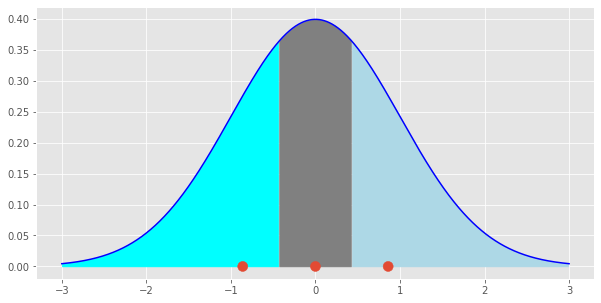

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as stats
#plt.style.use('ggplot')
mean=0
std=1
sc_location=.86
dividing_line = sc_location / 2

x=np.linspace(-3, 3, 1000)
iq=stats.norm(mean,std)
fig, axis = plt.subplots(1,1, figsize=(10,5))

axis.plot(x,iq.pdf(x),'b')

px=np.arange(-3,-dividing_line,.01)
axis.fill_between(px,iq.pdf(px),color='cyan')

px=np.arange(dividing_line,3,.01)
axis.fill_between(px,iq.pdf(px),color='lightblue')

px=np.arange(-dividing_line, dividing_line,.01)
axis.fill_between(px,iq.pdf(px),color='gray')

axis.scatter([-sc_location, 0, sc_location], [0,0,0], s=[100,100,100])

In [ ]:
count = 10000
for dim in [1,2,3]:
    x = np.random.normal(0, 1, dim * count)
    x = np.array(x)
    x = x.reshape((count, dim))
    x = np.sum(x * x, axis = 1)
    x = np.mean(np.sqrt(x))
    print("dim %d euclidean of noise: %5.2f" % (dim, x * .05))

cdf of .166 is 0.4289 left/right balance of 0.8045


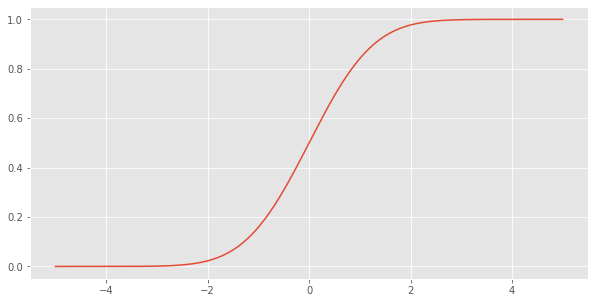

In [34]:
def CumulativeNormalDistribution(xRaw: float) -> float:
    if xRaw < 0:
        neg = 1
    else:
        neg = 0

    k = 1.0 / (1.0 + 0.2316419 * abs(xRaw))
    y = ((((1.330274429 * k - 1.821255978) * k + 1.781477937) * k - 0.356563782) * k + 0.319381530) * k
    y = 1.0 - 0.398942280401 * np.exp(-0.5 * (xRaw * xRaw)) * y
    return (1.0 - neg) * y + neg * (1.0 - y)

def plot_cdf():
    x = np.linspace(-5, 5, 1000)
    y = [CumulativeNormalDistribution(xx) for xx in x]
    fix, axis = plt.subplots(1,1,figsize = (10,5))
    axis.plot(x, y)

def find_cdf_value(v: float):
    xx = np.linspace(0, .5, 1000)
    y0 = CumulativeNormalDistribution(0)
    for x in xx:
        if CumulativeNormalDistribution(x) - y0 > v:
            return x

boundary = find_cdf_value(.166)
print("cdf of .166 is %6.4f left/right balance of %6.4f" % (boundary, CumulativeNormalDistribution(2 * boundary)))

plot_cdf()
